In [142]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

from numpy import array
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense, Activation
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras import regularizers, optimizers

from sklearn import preprocessing

In [144]:
initial_df = pd.read_csv(r"C:\Users\SANJANA\Desktop\RL\DOW_JONES_INTEGRATION\sp100_data_with_tickers.csv")

In [145]:
initial_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-12-03,21.201786,21.235357,20.910713,20.935356,17.951883,364280000,AAPL
1,2012-12-04,20.778570,20.778570,20.433214,20.566071,17.635214,557068400,AAPL
2,2012-12-05,20.318214,20.330357,19.241785,19.242500,16.500261,1044638000,AAPL
3,2012-12-06,18.890715,19.761070,18.522499,19.544287,16.759045,1177212400,AAPL
4,2012-12-07,19.764286,19.828571,18.928572,19.044643,16.330601,787040800,AAPL
...,...,...,...,...,...,...,...,...
250892,2022-12-23,106.949997,108.739998,106.900002,108.680000,106.922302,11539400,XOM
250893,2022-12-27,109.269997,110.470001,108.830002,110.190002,108.407875,11962100,XOM
250894,2022-12-28,109.910004,110.000000,107.900002,108.379997,106.627151,10702100,XOM
250895,2022-12-29,107.989998,109.720001,107.989998,109.199997,107.433884,10534000,XOM


In [146]:
import pandas as pd

df = pd.read_csv(r"C:\Users\SANJANA\Desktop\RL\DOW_JONES_INTEGRATION\sp100_data_with_tickers.csv")

df['date'] = pd.to_datetime(df['Date'])

df.set_index('date', inplace=True)
pivot_df = df.pivot(columns='Ticker', values='Close')
pivot_df = pivot_df.fillna(value=pd.np.nan)
pivot_df = pivot_df.bfill()


In [147]:
pivot_df

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2012-12-03,20.935356,35.119999,30.846342,67.830002,34.700001,33.119999,2.360000,88.400002,74.879997,12.516500,...,53.889999,60.715000,72.269997,32.049999,37.160000,44.099998,34.279999,32.750000,71.339996,87.610001
2012-12-04,20.566071,35.119999,30.894321,68.610001,35.299999,33.320000,2.260000,88.330002,74.830002,12.624500,...,53.540001,61.185001,73.040001,31.430000,36.897499,43.669998,34.270000,32.740002,72.120003,87.190002
2012-12-05,19.242500,35.119999,30.966291,69.599998,35.400002,33.779999,2.290000,89.010002,74.610001,12.698000,...,53.840000,61.430000,73.500000,31.760000,37.014999,44.099998,35.570000,32.980000,71.650002,87.730003
2012-12-06,19.544287,35.119999,30.985483,69.800003,35.139999,33.259998,2.340000,88.540001,74.980003,12.668500,...,53.650002,61.564999,72.930000,31.809999,37.117500,44.450001,35.849998,33.139999,71.589996,88.000000
2012-12-07,19.044643,35.119999,31.441294,69.480003,35.480000,34.130001,2.360000,88.320000,75.449997,12.663500,...,53.869999,61.974998,73.169998,32.020000,37.137501,44.410000,36.099998,33.230000,72.290001,88.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,163.100006,108.180000,266.089996,338.450012,63.160000,64.519997,263.920013,212.449997,85.250000,...,531.309998,209.910004,177.009995,43.200001,205.830002,38.410000,38.630001,40.980000,143.770004,108.680000
2022-12-27,130.029999,162.990005,108.570000,265.309998,335.089996,63.330002,63.270000,263.390015,210.899994,83.040001,...,531.989990,210.320007,176.929993,43.650002,206.289993,39.250000,38.310001,41.040001,143.809998,110.190002
2022-12-28,126.040001,162.229996,107.830002,263.119995,328.329987,62.889999,62.570000,261.420013,210.100006,81.820000,...,528.450012,206.869995,173.610001,43.349998,204.990005,38.810001,37.580002,41.119999,141.289993,108.379997


In [148]:
nan_counts = pivot_df.isna().sum()
print(nan_counts)

Ticker
AAPL    0
ABBV    0
ABT     0
ACN     0
ADBE    0
       ..
VZ      0
WBA     0
WFC     0
WMT     0
XOM     0
Length: 100, dtype: int64


In [149]:
pivot_df.shape

(2538, 100)

In [150]:
pivot_df.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2012-12-03,20.935356,35.119999,30.846342,67.830002,34.700001,33.119999,2.36,88.400002,74.879997,12.5165,...,53.889999,60.715000,72.269997,32.049999,37.160000,44.099998,34.279999,32.750000,71.339996,87.610001
2012-12-04,20.566071,35.119999,30.894321,68.610001,35.299999,33.320000,2.26,88.330002,74.830002,12.6245,...,53.540001,61.185001,73.040001,31.430000,36.897499,43.669998,34.270000,32.740002,72.120003,87.190002
2012-12-05,19.242500,35.119999,30.966291,69.599998,35.400002,33.779999,2.29,89.010002,74.610001,12.6980,...,53.840000,61.430000,73.500000,31.760000,37.014999,44.099998,35.570000,32.980000,71.650002,87.730003
2012-12-06,19.544287,35.119999,30.985483,69.800003,35.139999,33.259998,2.34,88.540001,74.980003,12.6685,...,53.650002,61.564999,72.930000,31.809999,37.117500,44.450001,35.849998,33.139999,71.589996,88.000000
2012-12-07,19.044643,35.119999,31.441294,69.480003,35.480000,34.130001,2.36,88.320000,75.449997,12.6635,...,53.869999,61.974998,73.169998,32.020000,37.137501,44.410000,36.099998,33.230000,72.290001,88.599998


In [151]:
df_pct_change = pivot_df.pct_change(1).astype(float)
df_pct_change = df_pct_change.replace([np.inf, -np.inf], np.nan)
df_pct_change = df_pct_change.fillna(method='ffill')


In [152]:
df_pct_change.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2012-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-04,-0.017639,0.0,0.001555,0.011499,0.017291,0.006039,-0.042373,-0.000792,-0.000668,0.008629,...,-0.006495,0.007741,0.010655,-0.019345,-0.007064,-0.009751,-0.000292,-0.000305,0.010934,-0.004794
2012-12-05,-0.064357,0.0,0.002330,0.014429,0.002833,0.013805,0.013274,0.007698,-0.002940,0.005822,...,0.005603,0.004004,0.006298,0.010500,0.003185,0.009847,0.037934,0.007330,-0.006517,0.006193
2012-12-06,0.015683,0.0,0.000620,0.002874,-0.007345,-0.015394,0.021834,-0.005280,0.004959,-0.002323,...,-0.003529,0.002198,-0.007755,0.001574,0.002769,0.007937,0.007872,0.004851,-0.000837,0.003078
2012-12-07,-0.025565,0.0,0.014710,-0.004585,0.009676,0.026158,0.008547,-0.002485,0.006268,-0.000395,...,0.004101,0.006660,0.003291,0.006602,0.000539,-0.000900,0.006974,0.002716,0.009778,0.006818


In [153]:
# the percentage change function will make the first two rows equal to nan
df_pct_change = df_pct_change.tail(len(df_pct_change) - 1)

In [154]:
df_pct_change.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
date,,,,,,,,,,,,,,,,,,,,,
2012-12-04,-0.017639,0.0,0.001555,0.011499,0.017291,0.006039,-0.042373,-0.000792,-0.000668,0.008629,...,-0.006495,0.007741,0.010655,-0.019345,-0.007064,-0.009751,-0.000292,-0.000305,0.010934,-0.004794
2012-12-05,-0.064357,0.0,0.002330,0.014429,0.002833,0.013805,0.013274,0.007698,-0.002940,0.005822,...,0.005603,0.004004,0.006298,0.010500,0.003185,0.009847,0.037934,0.007330,-0.006517,0.006193
2012-12-06,0.015683,0.0,0.000620,0.002874,-0.007345,-0.015394,0.021834,-0.005280,0.004959,-0.002323,...,-0.003529,0.002198,-0.007755,0.001574,0.002769,0.007937,0.007872,0.004851,-0.000837,0.003078
2012-12-07,-0.025565,0.0,0.014710,-0.004585,0.009676,0.026158,0.008547,-0.002485,0.006268,-0.000395,...,0.004101,0.006660,0.003291,0.006602,0.000539,-0.000900,0.006974,0.002716,0.009778,0.006818
2012-12-10,-0.006432,0.0,-0.003052,0.000432,0.007610,-0.022561,-0.016949,0.016078,-0.004374,-0.021716,...,0.005940,0.010327,0.006970,-0.003748,0.000740,-0.008557,0.006925,-0.005417,-0.001937,-0.002144


In [155]:
df_pct_change.shape

(2537, 100)

In [156]:
# remove columns where there is no change over a longer time period
df_pct_change = df_pct_change[df_pct_change.columns[((df_pct_change == 0).mean() <= 0.05)]]

In [157]:
df_pct_change.shape

(2537, 97)

In [158]:
#define autoencoder


def defineAutoencoder(num_stock, encoding_dim = 5, verbose=0):
    
    """
    Function for fitting an Autoencoder
    """

    # connect all layers
    input = Input(shape=(num_stock,))

    encoded = Dense(encoding_dim, kernel_regularizer=regularizers.l2(0.00001),name ='Encoder_Input')(input)

    decoded = Dense(num_stock, kernel_regularizer=regularizers.l2(0.00001), name ='Decoder_Input')(encoded)
    decoded = Activation("linear", name='Decoder_Activation_function')(decoded)

    # construct and compile AE model
    autoencoder = Model(inputs=input, outputs=decoded)
    adam = optimizers.Adam(lr=0.0005)
    autoencoder.compile(optimizer=adam, loss='mean_squared_error')
    if verbose!= 0:
        autoencoder.summary()

    return autoencoder

In [159]:
def getReconstructionErrorsDF(df_pct_change, reconstructed_data):
    
    """
    Function for calculating the reconstruction Errors
    """
    array = []
    stocks_ranked = []
    num_columns = reconstructed_data.shape[1]
    for i in range(0, num_columns):
        diff = np.linalg.norm((df_pct_change.iloc[:, i] - reconstructed_data[:, i]))  # 2 norm difference
        array.append(float(diff))

    ranking = np.array(array).argsort()
    r = 1
    for stock_index in ranking:
        stocks_ranked.append([ r
                              ,stock_index
                              ,df_pct_change.iloc[:, stock_index].name
                              ,array[stock_index]
                              ])
        r = r + 1

    columns = ['ranking','stock_index', 'stock_name' ,'recreation_error']
    df = pd.DataFrame(stocks_ranked, columns=columns)
    df = df.set_index('stock_name')
    return df

In [160]:
# define the input parameters
hidden_layers = 5
batch_size = 500
epochs = 500
stock_selection_number = 20
num_stock = df_pct_change.shape[1]
verbose = 1

In [161]:
# Normalize the data
df_scaler = preprocessing.MinMaxScaler()
df_pct_change_normalised = df_scaler.fit_transform(df_pct_change)

In [162]:
# define autoencoder
print('-' * 25 + 'Define autoencoder model')
num_stock = len(df_pct_change.columns)
autoencoder = defineAutoencoder(num_stock=num_stock, encoding_dim=hidden_layers, verbose=verbose)


-------------------------Define autoencoder model
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 97)]              0         
                                                                 
 Encoder_Input (Dense)       (None, 5)                 490       
                                                                 
 Decoder_Input (Dense)       (None, 97)                582       
                                                                 
 Decoder_Activation_function  (None, 97)               0         
  (Activation)                                                   
                                                                 
Total params: 1,072
Trainable params: 1,072
Non-trainable params: 0
_________________________________________________________________


C:\Users\SANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [163]:
# train autoencoder
print('-' * 25 + 'Train autoencoder model')
autoencoder.fit(df_pct_change_normalised, df_pct_change_normalised, shuffle=False, epochs=epochs,
                batch_size=batch_size,
                verbose=verbose)

-------------------------Train autoencoder model
Epoch 1/500
6/6 [==============================] - 1s 4ms/step - loss: 0.3571
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.3214
Epoch 3/500
6/6 [==============================] - 0s 5ms/step - loss: 0.2948
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2748
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2589
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2454
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2336
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2227
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2124
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.2022
Epoch 11/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1920
Epoch 12/500
6/6 [==============================] - 0s 3ms/step - loss: 0.1816
Epoch 13/500

6/6 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 105/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 106/500
6/6 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 107/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 108/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 109/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 110/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 111/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 112/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 113/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 114/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 115/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 116/500
6/6 [==============================] - 0

6/6 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 207/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 208/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 209/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 210/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 211/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 212/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 213/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 214/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 215/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 216/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 217/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 218/500
6/6 [==============================] - 0

6/6 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 309/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 310/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 311/500
6/6 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 312/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 313/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 314/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 315/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 316/500
6/6 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 317/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 318/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 319/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 320/500
6/6 [==============================] - 0

6/6 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 411/500
6/6 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 412/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 413/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 414/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 415/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 416/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 417/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 418/500
6/6 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 419/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 420/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 421/500
6/6 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 422/500
6/6 [==============================] - 0

In [164]:
reconstruct = autoencoder.predict(df_pct_change_normalised)

80/80 [==============================] - 0s 2ms/step


In [165]:
reconstruct_real = df_scaler.inverse_transform(reconstruct)
df_reconstruct_real = pd.DataFrame(data=reconstruct_real, columns=df_pct_change.columns)
df_recreation_error = getReconstructionErrorsDF(df_pct_change=df_pct_change,
                                                reconstructed_data=reconstruct_real)

In [166]:
df_recreation_error

,ranking,stock_index,recreation_error
stock_name,,,
JNJ,1,48,0.442570
PG,2,73,0.493552
KO,3,50,0.496830
MCD,4,56,0.499636
USB,5,90,0.502357
...,...,...,...
NVDA,93,69,1.100420
TMUS,94,84,1.127238
NFLX,95,67,1.606119


In [167]:
filtered_stocks = df_recreation_error.head(stock_selection_number).index

In [168]:
stock_selection_number

20

In [169]:
filtered_stocks

Index(['JNJ', 'PG', 'KO', 'MCD', 'USB', 'JPM', 'GD', 'VZ', 'MMM', 'PEP', 'CL',
       'LIN', 'DHR', 'HON', 'LMT', 'MDT', 'V', 'RTX', 'T', 'COST'],
      dtype='object', name='stock_name')

In [170]:
selected_stocks = filtered_stocks
print(selected_stocks)

Index(['JNJ', 'PG', 'KO', 'MCD', 'USB', 'JPM', 'GD', 'VZ', 'MMM', 'PEP', 'CL',
       'LIN', 'DHR', 'HON', 'LMT', 'MDT', 'V', 'RTX', 'T', 'COST'],
      dtype='object', name='stock_name')


In [171]:
initial_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2012-12-03,21.201786,21.235357,20.910713,20.935356,17.951883,364280000,AAPL
1,2012-12-04,20.778570,20.778570,20.433214,20.566071,17.635214,557068400,AAPL
2,2012-12-05,20.318214,20.330357,19.241785,19.242500,16.500261,1044638000,AAPL
3,2012-12-06,18.890715,19.761070,18.522499,19.544287,16.759045,1177212400,AAPL
4,2012-12-07,19.764286,19.828571,18.928572,19.044643,16.330601,787040800,AAPL


In [172]:
initial_df = initial_df.drop('Adj Close', axis=1)

In [173]:
initial_df['Ticker'].unique()

array(['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT',
       'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY',
       'C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM',
       'CSCO', 'CVS', 'CVX', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC',
       'F', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD',
       'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KHC', 'KO', 'LIN', 'LLY',
       'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'META', 'MMM',
       'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL',
       'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SCHW',
       'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH',
       'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC', 'WMT', 'XOM'],
      dtype=object)

In [174]:
data = initial_df[initial_df['Ticker'].isin(selected_stocks)]

In [175]:
data.Ticker.unique()

array(['CL', 'COST', 'DHR', 'GD', 'HON', 'JNJ', 'JPM', 'KO', 'LIN', 'LMT',
       'MCD', 'MDT', 'MMM', 'PEP', 'PG', 'RTX', 'T', 'USB', 'V', 'VZ'],
      dtype=object)

In [176]:
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from finrl.preprocessing.data import data_split
from finrl.preprocessing.preprocessors import FeatureEngineer

In [177]:
# Define a Function for adding technical indicators

def add_features(data, feature_list, short_names):

    data_col_names = list(data.columns)
    filter_names = data_col_names + feature_list
    col_rename = data_col_names +  short_names
    
    # Add technical indicators using the ta Library
    data = add_all_ta_features(data, open="Open", high="High", 
    low="Low", close="Close", volume="Volume") 
    
    # Filter the Indicators with the required features
    data = data[filter_names]
    data.columns = col_rename # rename the columns to use shortened indicator names
    data = data.dropna()
    
    return data


# List of Features to add
feature_list= ['volatility_atr','volatility_bbw','volume_obv','volume_cmf',
               'trend_macd', 'trend_adx', 'trend_sma_fast', 
               'trend_ema_fast', 'trend_cci', 'momentum_rsi']

# Short names of the features
short_names = ['atr', 'bbw','obv','cmf','macd', 'adx', 'sma', 'ema', 'cci', 'rsi']

In [178]:
# Add Indicators to our dataset
data_with_features = data.copy()

data_with_features = add_features(data_with_features, feature_list, short_names)

C:\Users\SANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\SANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [179]:
data_with_features

,Date,Open,High,Low,Close,Volume,Ticker,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
53303,2013-01-09,53.174999,53.320000,52.945000,53.064999,1967800,CL,0.606628,3.809607,-10729600,0.002008,-0.134796,0.000000,52.837917,53.058077,16.567053,48.360834
53304,2013-01-10,53.150002,53.695000,53.025002,53.695000,2521600,CL,0.612965,3.657817,-8208000,0.022100,-0.074002,0.000000,52.933333,53.156065,85.758151,54.995763
53305,2013-01-11,53.779999,53.959999,53.490002,53.544998,2032000,CL,0.598668,3.678000,-10240000,0.023291,-0.037495,24.425343,53.018333,53.215901,120.113237,53.241689
53306,2013-01-14,53.654999,54.060001,53.500000,53.965000,1464400,CL,0.594802,4.004830,-8775600,0.083019,0.025040,23.674760,53.152500,53.331147,137.797634,57.344092
53307,2013-01-15,53.650002,53.955002,53.404999,53.869999,2236000,CL,0.591322,4.217783,-11011600,0.162404,0.066171,22.768322,53.255417,53.414047,108.474006,56.144187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240740,2022-12-23,38.310001,38.540001,37.919998,38.410000,16918300,VZ,0.789779,6.305874,11949677290,0.095259,-0.033100,10.992571,37.597500,37.747024,78.205062,56.449715
240741,2022-12-27,38.490002,39.400002,38.320000,39.250000,25315900,VZ,0.818801,7.141455,11974993190,0.161281,0.089248,12.037531,37.776667,37.978251,159.709540,62.900383
240742,2022-12-28,39.189999,39.660000,38.590000,38.810001,21793200,VZ,0.843921,7.424203,11953199990,0.112142,0.148987,13.249353,37.894167,38.106213,146.369938,58.050036
240743,2022-12-29,38.900002,39.529999,38.810001,39.259998,17347000,VZ,0.831529,7.695248,11970546990,0.082521,0.229991,14.374616,38.003333,38.283718,158.040912,61.333953


In [180]:
data_with_features.head()

,Date,Open,High,Low,Close,Volume,Ticker,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
53303,2013-01-09,53.174999,53.320000,52.945000,53.064999,1967800,CL,0.606628,3.809607,-10729600,0.002008,-0.134796,0.000000,52.837917,53.058077,16.567053,48.360834
53304,2013-01-10,53.150002,53.695000,53.025002,53.695000,2521600,CL,0.612965,3.657817,-8208000,0.022100,-0.074002,0.000000,52.933333,53.156065,85.758151,54.995763
53305,2013-01-11,53.779999,53.959999,53.490002,53.544998,2032000,CL,0.598668,3.678000,-10240000,0.023291,-0.037495,24.425343,53.018333,53.215901,120.113237,53.241689
53306,2013-01-14,53.654999,54.060001,53.500000,53.965000,1464400,CL,0.594802,4.004830,-8775600,0.083019,0.025040,23.674760,53.152500,53.331147,137.797634,57.344092
53307,2013-01-15,53.650002,53.955002,53.404999,53.869999,2236000,CL,0.591322,4.217783,-11011600,0.162404,0.066171,22.768322,53.255417,53.414047,108.474006,56.144187


In [181]:
data_with_features = data_with_features.rename(columns={'Date': 'date'})

In [182]:
data_with_features.head()

,date,Open,High,Low,Close,Volume,Ticker,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
53303,2013-01-09,53.174999,53.320000,52.945000,53.064999,1967800,CL,0.606628,3.809607,-10729600,0.002008,-0.134796,0.000000,52.837917,53.058077,16.567053,48.360834
53304,2013-01-10,53.150002,53.695000,53.025002,53.695000,2521600,CL,0.612965,3.657817,-8208000,0.022100,-0.074002,0.000000,52.933333,53.156065,85.758151,54.995763
53305,2013-01-11,53.779999,53.959999,53.490002,53.544998,2032000,CL,0.598668,3.678000,-10240000,0.023291,-0.037495,24.425343,53.018333,53.215901,120.113237,53.241689
53306,2013-01-14,53.654999,54.060001,53.500000,53.965000,1464400,CL,0.594802,4.004830,-8775600,0.083019,0.025040,23.674760,53.152500,53.331147,137.797634,57.344092
53307,2013-01-15,53.650002,53.955002,53.404999,53.869999,2236000,CL,0.591322,4.217783,-11011600,0.162404,0.066171,22.768322,53.255417,53.414047,108.474006,56.144187


In [183]:
#adding covariance matrix


def add_cov_matrix(df):
    """
    Function to add Coveriance Matrices as part of the defined states
    """
    # Sort the data and index by date and tic
    df=df.sort_values(['date','Ticker'],ignore_index=True) 
    df.index = df.date.factorize()[0]
    
    cov_list = [] # create empty list for storing coveriance matrices at each time step
    
    # look back for constructing the coveriance matrix is one year
    lookback=252
    for i in range(lookback,len(df.index.unique())):
        data_lookback = df.loc[i-lookback:i,:]
        price_lookback=data_lookback.pivot_table(index = 'date',columns = 'Ticker', values = 'Close')
        return_lookback = price_lookback.pct_change().dropna()
        covs = return_lookback.cov().values 
        covs = covs#/covs.max()
        cov_list.append(covs)
        
    df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list})
    df = df.merge(df_cov, on='date')
    df = df.sort_values(['date','Ticker']).reset_index(drop=True)
    
    return df

In [184]:
# Add Covariance Matrices to our dataset
data_with_features_covs = data_with_features.copy()
data_with_features_covs = add_cov_matrix(data_with_features_covs)

In [185]:
data_with_features_covs

,date,Open,High,Low,Close,Volume,Ticker,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2013-12-03,65.010002,65.430000,64.879997,65.370003,2183700,CL,0.736201,2.917910,59133500,0.140533,0.589751,26.368171,65.665834,65.550861,-36.130018,54.933937,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
1,2013-12-03,123.720001,123.970001,122.970001,123.820000,1767900,COST,1.433317,4.010875,385073300,0.175502,1.509197,29.628245,124.313333,124.062547,-2.234842,57.565631,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
2,2013-12-03,56.315392,56.444275,55.754360,55.928734,3117061,DHR,0.673827,4.568752,629198375,-0.035569,0.580076,30.145718,56.503033,56.389011,-27.073061,51.823937,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
3,2013-12-03,91.089996,91.360001,90.019997,90.339996,1198600,GD,1.073160,8.936027,1332459783,0.174849,1.114092,24.278320,90.815000,90.598526,44.496106,55.851273,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
4,2013-12-03,83.848846,83.848846,82.638069,83.009888,2430852,HON,0.994786,4.271538,1557103883,-0.040978,0.525893,14.602989,84.121355,83.903915,-42.299743,47.762318,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45715,2022-12-30,100.279999,101.010002,99.779999,100.919998,2984100,RTX,1.710921,3.791303,8388578676,0.063938,1.010825,14.130540,99.176667,99.443249,116.001722,61.402890,"[[0.0001622733871503801, 0.0001196456385651904..."
45716,2022-12-30,18.420000,18.480000,18.219999,18.410000,26204200,T,0.346544,9.359277,10466197590,0.145833,-0.079796,21.834460,18.338333,18.437117,-44.059396,47.847232,"[[0.0001622733871503801, 0.0001196456385651904..."
45717,2022-12-30,43.400002,43.799999,43.279999,43.610001,5737900,USB,0.841648,7.495823,11224326390,0.053584,-0.043884,11.191549,42.925000,43.252141,34.514776,52.703524,"[[0.0001622733871503801, 0.0001196456385651904..."
45718,2022-12-30,206.309998,208.039993,205.699997,207.759995,4159400,V,3.791076,6.862015,12457940590,-0.087997,-0.201309,9.991681,206.925001,207.348775,-38.306813,50.522009,"[[0.0001622733871503801, 0.0001196456385651904..."


In [186]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

from sklearn import preprocessing

In [187]:
data_with_features_covs.head()

,date,Open,High,Low,Close,Volume,Ticker,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2013-12-03,65.010002,65.430000,64.879997,65.370003,2183700,CL,0.736201,2.917910,59133500,0.140533,0.589751,26.368171,65.665834,65.550861,-36.130018,54.933937,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
1,2013-12-03,123.720001,123.970001,122.970001,123.820000,1767900,COST,1.433317,4.010875,385073300,0.175502,1.509197,29.628245,124.313333,124.062547,-2.234842,57.565631,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
2,2013-12-03,56.315392,56.444275,55.754360,55.928734,3117061,DHR,0.673827,4.568752,629198375,-0.035569,0.580076,30.145718,56.503033,56.389011,-27.073061,51.823937,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
3,2013-12-03,91.089996,91.360001,90.019997,90.339996,1198600,GD,1.073160,8.936027,1332459783,0.174849,1.114092,24.278320,90.815000,90.598526,44.496106,55.851273,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
4,2013-12-03,83.848846,83.848846,82.638069,83.009888,2430852,HON,0.994786,4.271538,1557103883,-0.040978,0.525893,14.602989,84.121355,83.903915,-42.299743,47.762318,"[[9.88188682115059e-05, 4.637338976698862e-05,..."


In [188]:
# Get the list of all the features
features_list = list(data_with_features_covs.columns)[7:-1]

In [189]:
print(features_list)

['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


In [190]:
# construct a data frame of features
features_df = data_with_features_covs[features_list]
features_df.index = data_with_features_covs['date']
features_df.head()

,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
date,,,,,,,,,,
2013-12-03,0.736201,2.917910,59133500,0.140533,0.589751,26.368171,65.665834,65.550861,-36.130018,54.933937
2013-12-03,1.433317,4.010875,385073300,0.175502,1.509197,29.628245,124.313333,124.062547,-2.234842,57.565631
2013-12-03,0.673827,4.568752,629198375,-0.035569,0.580076,30.145718,56.503033,56.389011,-27.073061,51.823937
2013-12-03,1.073160,8.936027,1332459783,0.174849,1.114092,24.278320,90.815000,90.598526,44.496106,55.851273
2013-12-03,0.994786,4.271538,1557103883,-0.040978,0.525893,14.602989,84.121355,83.903915,-42.299743,47.762318


In [191]:
data_with_features_covs.shape

(45720, 18)

In [192]:
features_df.shape

(45720, 10)

In [193]:
features_array = np.array(features_df)

features_scaler = preprocessing.MinMaxScaler()
features_normalised = features_scaler.fit_transform(features_array)

In [194]:
# rescale the features array
features_normalised = features_normalised.reshape(-1,20,10)

In [195]:
features_normalised.shape

(2286, 20, 10)

In [196]:
# define model
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(20,10)))
model.add(RepeatVector(20))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(10)))
model.compile(optimizer='adam', loss='mse')

In [197]:
# fit model
model.fit(features_normalised, features_normalised, epochs=100, verbose=1)


Epoch 1/100
72/72 [==============================] - 4s 17ms/step - loss: 0.0725
Epoch 2/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0166
Epoch 3/100
72/72 [==============================] - 1s 19ms/step - loss: 0.0111
Epoch 4/100
72/72 [==============================] - 1s 19ms/step - loss: 0.0103
Epoch 5/100
72/72 [==============================] - 1s 18ms/step - loss: 0.0098
Epoch 6/100
72/72 [==============================] - 1s 18ms/step - loss: 0.0091
Epoch 7/100
72/72 [==============================] - 1s 19ms/step - loss: 0.0087
Epoch 8/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0083
Epoch 9/100
72/72 [==============================] - 1s 18ms/step - loss: 0.0078
Epoch 10/100
72/72 [==============================] - 2s 22ms/step - loss: 0.0074
Epoch 11/100
72/72 [==============================] - 1s 19ms/step - loss: 0.0071
Epoch 12/100
72/72 [==============================] - 1s 20ms/step - loss: 0.0068
Epoch 13/100
72/72 [=====

In [198]:
plot_model(model, show_shapes=True, to_file='./results/reconstruct_lstm_autoencoder.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [199]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 240       
                                                                 
 repeat_vector (RepeatVector  (None, 20, 4)            0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 20, 100)           42000     
                                                                 
 time_distributed (TimeDistr  (None, 20, 10)           1010      
 ibuted)                                                         
                                                                 
Total params: 43,250
Trainable params: 43,250
Non-trainable params: 0
_________________________________________________________________


In [200]:
# connect the encoder LSTM as the output layer
model_feature = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [201]:
model_feature.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 20, 10)]          0         
                                                                 
 lstm (LSTM)                 (None, 4)                 240       
                                                                 
 repeat_vector (RepeatVector  (None, 20, 4)            0         
 )                                                               
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


In [202]:
%store features_df

Stored 'features_df' (DataFrame)


In [203]:
%store -r features_df

In [204]:
yhat = model_feature.predict(features_normalised)
print(yhat.shape)

72/72 [==============================] - 0s 3ms/step
(2286, 20, 4)


In [205]:
reduced_features = yhat.reshape(-1,4)

In [206]:
reduced_features.shape

(45720, 4)

In [207]:
data_with_features_covs.shape

(45720, 18)

In [208]:
final_df = data_with_features_covs.copy()
final_df.head()

,date,Open,High,Low,Close,Volume,Ticker,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2013-12-03,65.010002,65.430000,64.879997,65.370003,2183700,CL,0.736201,2.917910,59133500,0.140533,0.589751,26.368171,65.665834,65.550861,-36.130018,54.933937,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
1,2013-12-03,123.720001,123.970001,122.970001,123.820000,1767900,COST,1.433317,4.010875,385073300,0.175502,1.509197,29.628245,124.313333,124.062547,-2.234842,57.565631,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
2,2013-12-03,56.315392,56.444275,55.754360,55.928734,3117061,DHR,0.673827,4.568752,629198375,-0.035569,0.580076,30.145718,56.503033,56.389011,-27.073061,51.823937,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
3,2013-12-03,91.089996,91.360001,90.019997,90.339996,1198600,GD,1.073160,8.936027,1332459783,0.174849,1.114092,24.278320,90.815000,90.598526,44.496106,55.851273,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
4,2013-12-03,83.848846,83.848846,82.638069,83.009888,2430852,HON,0.994786,4.271538,1557103883,-0.040978,0.525893,14.602989,84.121355,83.903915,-42.299743,47.762318,"[[9.88188682115059e-05, 4.637338976698862e-05,..."


In [209]:
final_df = final_df.drop(features_list, axis=1)

In [210]:
final_df.head()

,date,Open,High,Low,Close,Volume,Ticker,cov_list
0,2013-12-03,65.010002,65.430000,64.879997,65.370003,2183700,CL,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
1,2013-12-03,123.720001,123.970001,122.970001,123.820000,1767900,COST,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
2,2013-12-03,56.315392,56.444275,55.754360,55.928734,3117061,DHR,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
3,2013-12-03,91.089996,91.360001,90.019997,90.339996,1198600,GD,"[[9.88188682115059e-05, 4.637338976698862e-05,..."
4,2013-12-03,83.848846,83.848846,82.638069,83.009888,2430852,HON,"[[9.88188682115059e-05, 4.637338976698862e-05,..."


In [211]:
features_reduced_df = pd.DataFrame(reduced_features, columns=['f01','f02','f03','f04'])

In [212]:
features_reduced_df.head()

,f01,f02,f03,f04
0,0.968878,1.040823,1.991801,1.938116
1,0.968878,1.040823,1.991801,1.938116
2,0.968878,1.040823,1.991801,1.938116
3,0.968878,1.040823,1.991801,1.938116
4,0.968878,1.040823,1.991801,1.938116


In [213]:
# features_reduced_df = features_reduced_df.drop( 'f03',axis=1)

In [214]:
final_df[['f01','f02', 'f03','f04']] = features_reduced_df[['f01','f02', 'f03','f04']]

In [215]:
final_df.head()

,date,Open,High,Low,Close,Volume,Ticker,cov_list,f01,f02,f03,f04
0,2013-12-03,65.010002,65.430000,64.879997,65.370003,2183700,CL,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
1,2013-12-03,123.720001,123.970001,122.970001,123.820000,1767900,COST,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
2,2013-12-03,56.315392,56.444275,55.754360,55.928734,3117061,DHR,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
3,2013-12-03,91.089996,91.360001,90.019997,90.339996,1198600,GD,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
4,2013-12-03,83.848846,83.848846,82.638069,83.009888,2430852,HON,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116


In [216]:
final_df.shape

(45720, 12)

In [217]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
date,,,,,,,,
2012-12-03,2012-12-03,21.201786,21.235357,20.910713,20.935356,17.951883,364280000,AAPL
2012-12-04,2012-12-04,20.778570,20.778570,20.433214,20.566071,17.635214,557068400,AAPL
2012-12-05,2012-12-05,20.318214,20.330357,19.241785,19.242500,16.500261,1044638000,AAPL
2012-12-06,2012-12-06,18.890715,19.761070,18.522499,19.544287,16.759045,1177212400,AAPL
2012-12-07,2012-12-07,19.764286,19.828571,18.928572,19.044643,16.330601,787040800,AAPL


In [218]:
df_prices = final_df.reset_index().set_index(['Ticker', 'date']).sort_index()

In [219]:
df_close = pd.DataFrame()

for ticker in filtered_stocks:
    series = df_prices.xs(ticker).Close
    df_close[ticker] = series

In [220]:
df_close.head()

,JNJ,PG,KO,MCD,USB,JPM,GD,VZ,MMM,PEP,CL,LIN,DHR,HON,LMT,MDT,V,RTX,T,COST
date,,,,,,,,,,,,,,,,,,,,
2013-12-03,93.970001,83.830002,40.349998,96.379997,38.520000,56.860001,90.339996,49.599998,126.599998,83.800003,65.370003,124.239998,55.928734,83.009888,138.770004,57.639999,50.437500,69.030838,26.238670,123.820000
2013-12-04,93.629997,83.349998,40.369999,95.709999,39.000000,57.189999,89.480003,49.369999,126.459999,82.650002,65.040001,123.620003,55.845337,82.781075,136.229996,56.930000,50.685001,68.558846,26.132931,122.970001
2013-12-05,92.970001,82.690002,39.830002,95.430000,38.610001,55.820000,89.230003,48.910000,126.830002,81.900002,64.540001,122.489998,55.830173,82.809677,136.660004,56.910000,50.427502,68.628067,25.868580,120.949997
2013-12-06,94.440002,84.519997,40.459999,96.800003,39.660000,56.060001,90.790001,49.480000,128.610001,83.150002,65.660004,125.459999,56.952236,84.201599,138.190002,58.139999,50.467499,69.930771,26.080059,122.059998
2013-12-09,94.440002,84.779999,40.400002,95.720001,39.740002,56.509998,90.529999,49.570000,128.570007,82.690002,65.690002,125.410004,57.149357,83.772583,138.929993,57.869999,50.397499,69.968536,26.200907,121.660004


In [221]:
df_close.shape

(2286, 20)

In [222]:
%store df_close
%store features_reduced_df
%store final_df

Stored 'df_close' (DataFrame)
Stored 'features_reduced_df' (DataFrame)
Stored 'final_df' (DataFrame)


In [223]:
%store -r df_close
%store -r final_df
%store -r features_reduced_df

In [224]:
df_close = df_close.reset_index()

In [225]:
# Define the start and end dates for the train and test data

train_pct = 0.8 # percentage of train data
date_list = list(final_df.date.unique()) # List of dates in the data

date_list_len = len(date_list) # len of the date list
train_data_len = int(train_pct * date_list_len) # length of the train data

train_start_date = date_list[0]
train_end_date = date_list[train_data_len]

test_start_date = date_list[train_data_len+1]
test_end_date = date_list[-1]

In [226]:
print('Training Data: ', 'from ', train_start_date, ' to ', train_end_date)

Training Data:  from  2013-12-03  to  2021-03-10


In [227]:
print('Testing Data: ', 'from ', test_start_date, ' to ', test_end_date)

Testing Data:  from  2021-03-11  to  2022-12-30


In [228]:
import ta
from ta import add_all_ta_features
from ta.utils import dropna
from finrl.preprocessing.data import data_split
from finrl.preprocessing.preprocessors import FeatureEngineer

In [229]:
print(pivot_df.columns)


Index(['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT',
       'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY', 'C',
       'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO',
       'CVS', 'CVX', 'DHR', 'DIS', 'DOW', 'DUK', 'EMR', 'EXC', 'F', 'FDX',
       'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM',
       'INTC', 'JNJ', 'JPM', 'KHC', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MA',
       'MCD', 'MDLZ', 'MDT', 'MET', 'META', 'MMM', 'MO', 'MRK', 'MS', 'MSFT',
       'NEE', 'NFLX', 'NKE', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL',
       'QCOM', 'RTX', 'SBUX', 'SCHW', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS',
       'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WBA', 'WFC',
       'WMT', 'XOM'],
      dtype='object', name='Ticker')


In [230]:
final_df = final_df.rename(columns={'Ticker': 'tic'})

In [231]:
# Split the whole dataset
train_data = data_split(final_df, train_start_date, train_end_date)
test_data = data_split(final_df, test_start_date, test_end_date)

In [232]:
# Split the Close Prices dataset
prices_train_data = df_close[df_close['date']<=train_end_date]
prices_test_data = df_close[df_close['date']>=test_start_date]

# split the Close Prices of all stocks
prices_full_train = df_close[df_close['date']<=train_end_date]
prices_full_test = df_close[df_close['date']>=test_start_date]

In [233]:
prices_train = prices_train_data.copy()
prices_test = prices_test_data.copy()

train_df = train_data.copy()
test_df = test_data.copy()

prices_full_train_df = prices_full_train.copy()
prices_full_test_df = prices_full_test.copy()

In [234]:
train_df

,date,Open,High,Low,Close,Volume,tic,cov_list,f01,f02,f03,f04
0,2013-12-03,65.010002,65.430000,64.879997,65.370003,2183700,CL,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,123.720001,123.970001,122.970001,123.820000,1767900,COST,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,56.315392,56.444275,55.754360,55.928734,3117061,DHR,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,91.089996,91.360001,90.019997,90.339996,1198600,GD,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,83.848846,83.848846,82.638069,83.009888,2430852,HON,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
...,...,...,...,...,...,...,...,...,...,...,...,...
1827,2021-03-09,76.040001,76.699997,74.750000,74.830002,6558300,RTX,"[[0.00033739648202381155, 0.000211218829005817...",2.705900,1.114965,3.517446,0.767194
1827,2021-03-09,22.583082,22.764351,22.364048,22.386707,63488580,T,"[[0.00033739648202381155, 0.000211218829005817...",2.705900,1.114965,3.517446,0.767194
1827,2021-03-09,52.869999,53.840000,52.470001,52.900002,8899100,USB,"[[0.00033739648202381155, 0.000211218829005817...",2.705900,1.114965,3.517446,0.767194
1827,2021-03-09,222.059998,225.000000,220.190002,220.360001,9228600,V,"[[0.00033739648202381155, 0.000211218829005817...",2.705900,1.114965,3.517446,0.767194


In [235]:
import matplotlib.pylab as plt
from IPython.display import display, HTML
from datetime import datetime

In [236]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [237]:
from pypfopt import objective_functions

In [238]:
from backtest import BackTestStats, BaselineStats, BackTestPlot, backtest_strat, baseline_strat
from backtest import backtest_strat, baseline_strat

In [239]:
import env_portfolio
from env_portfolio import StockPortfolioEnv

import models
from models import DRLAgent

In [240]:
prices_full_train_df.head()

,date,JNJ,PG,KO,MCD,USB,JPM,GD,VZ,MMM,...,CL,LIN,DHR,HON,LMT,MDT,V,RTX,T,COST
0,2013-12-03,93.970001,83.830002,40.349998,96.379997,38.520000,56.860001,90.339996,49.599998,126.599998,...,65.370003,124.239998,55.928734,83.009888,138.770004,57.639999,50.437500,69.030838,26.238670,123.820000
1,2013-12-04,93.629997,83.349998,40.369999,95.709999,39.000000,57.189999,89.480003,49.369999,126.459999,...,65.040001,123.620003,55.845337,82.781075,136.229996,56.930000,50.685001,68.558846,26.132931,122.970001
2,2013-12-05,92.970001,82.690002,39.830002,95.430000,38.610001,55.820000,89.230003,48.910000,126.830002,...,64.540001,122.489998,55.830173,82.809677,136.660004,56.910000,50.427502,68.628067,25.868580,120.949997
3,2013-12-06,94.440002,84.519997,40.459999,96.800003,39.660000,56.060001,90.790001,49.480000,128.610001,...,65.660004,125.459999,56.952236,84.201599,138.190002,58.139999,50.467499,69.930771,26.080059,122.059998
4,2013-12-09,94.440002,84.779999,40.400002,95.720001,39.740002,56.509998,90.529999,49.570000,128.570007,...,65.690002,125.410004,57.149357,83.772583,138.929993,57.869999,50.397499,69.968536,26.200907,121.660004


In [241]:
import pandas as pd

In [242]:
df = pd.DataFrame(prices_full_train_df)
df

,date,JNJ,PG,KO,MCD,USB,JPM,GD,VZ,MMM,...,CL,LIN,DHR,HON,LMT,MDT,V,RTX,T,COST
0,2013-12-03,93.970001,83.830002,40.349998,96.379997,38.520000,56.860001,90.339996,49.599998,126.599998,...,65.370003,124.239998,55.928734,83.009888,138.770004,57.639999,50.437500,69.030838,26.238670,123.820000
1,2013-12-04,93.629997,83.349998,40.369999,95.709999,39.000000,57.189999,89.480003,49.369999,126.459999,...,65.040001,123.620003,55.845337,82.781075,136.229996,56.930000,50.685001,68.558846,26.132931,122.970001
2,2013-12-05,92.970001,82.690002,39.830002,95.430000,38.610001,55.820000,89.230003,48.910000,126.830002,...,64.540001,122.489998,55.830173,82.809677,136.660004,56.910000,50.427502,68.628067,25.868580,120.949997
3,2013-12-06,94.440002,84.519997,40.459999,96.800003,39.660000,56.060001,90.790001,49.480000,128.610001,...,65.660004,125.459999,56.952236,84.201599,138.190002,58.139999,50.467499,69.930771,26.080059,122.059998
4,2013-12-09,94.440002,84.779999,40.400002,95.720001,39.740002,56.509998,90.529999,49.570000,128.570007,...,65.690002,125.410004,57.149357,83.772583,138.929993,57.869999,50.397499,69.968536,26.200907,121.660004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,2021-03-04,153.070007,122.150002,49.939999,204.839996,51.020000,150.559998,165.770004,54.799999,177.630005,...,74.440002,245.419998,214.410004,202.940002,338.250000,115.269997,211.500000,74.419998,21.842899,319.040009
1825,2021-03-05,156.100006,125.980003,50.790001,207.369995,52.470001,150.910004,170.520004,56.000000,180.800003,...,76.059998,247.639999,218.350006,206.580002,340.429993,118.260002,215.410004,75.180000,22.371601,317.320007
1826,2021-03-08,157.399994,127.309998,51.639999,209.110001,54.049999,152.910004,172.690002,56.790001,183.770004,...,76.449997,253.679993,212.380005,207.699997,341.450012,116.669998,220.270004,75.610001,22.651056,311.420013
1827,2021-03-09,157.699997,126.180000,50.860001,208.550003,52.900002,151.830002,168.740005,56.200001,181.179993,...,74.940002,262.339996,216.339996,207.610001,337.500000,117.050003,220.360001,74.830002,22.386707,318.779999


In [243]:
df.set_index('date', inplace=True)

In [244]:
df.head()
# df = df.drop('level_0', axis=1)

,JNJ,PG,KO,MCD,USB,JPM,GD,VZ,MMM,PEP,CL,LIN,DHR,HON,LMT,MDT,V,RTX,T,COST
date,,,,,,,,,,,,,,,,,,,,
2013-12-03,93.970001,83.830002,40.349998,96.379997,38.520000,56.860001,90.339996,49.599998,126.599998,83.800003,65.370003,124.239998,55.928734,83.009888,138.770004,57.639999,50.437500,69.030838,26.238670,123.820000
2013-12-04,93.629997,83.349998,40.369999,95.709999,39.000000,57.189999,89.480003,49.369999,126.459999,82.650002,65.040001,123.620003,55.845337,82.781075,136.229996,56.930000,50.685001,68.558846,26.132931,122.970001
2013-12-05,92.970001,82.690002,39.830002,95.430000,38.610001,55.820000,89.230003,48.910000,126.830002,81.900002,64.540001,122.489998,55.830173,82.809677,136.660004,56.910000,50.427502,68.628067,25.868580,120.949997
2013-12-06,94.440002,84.519997,40.459999,96.800003,39.660000,56.060001,90.790001,49.480000,128.610001,83.150002,65.660004,125.459999,56.952236,84.201599,138.190002,58.139999,50.467499,69.930771,26.080059,122.059998
2013-12-09,94.440002,84.779999,40.400002,95.720001,39.740002,56.509998,90.529999,49.570000,128.570007,82.690002,65.690002,125.410004,57.149357,83.772583,138.929993,57.869999,50.397499,69.968536,26.200907,121.660004


In [245]:
%store df

Stored 'df' (DataFrame)


In [246]:
%store -r df

In [247]:
# Define a Function for Displaying the Cleaned Weights
def show_clean_p(port_df):
    p1_show_1 = (port_df.transpose()[0]).map(lambda x: "{:.3%}".format(x)).to_frame().transpose()
    return display(HTML(p1_show_1.to_html()))

In [248]:
import numpy as np
import pandas as pd

In [249]:
ticker_list = list(df.columns) # Get List of all ticker symbols
n_assets = len(ticker_list) # Number of assets


In [250]:
# Plotting the Daily Draw Down

ticker_symb = ['VZ']
prices = df[ticker_symb]
window = 250

def get_daily_max_drawdown(prices, window):
    max_rolling = prices.rolling(min_periods=1, window=window).max()
    daily_drawdown = (prices / max_rolling) - 1
    max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=window).min()
    return daily_drawdown,max_daily_drawdown

max_rolling = prices.rolling(min_periods=1, window=window).max()

daily_drawdown, max_daily_drawdown = get_daily_max_drawdown(prices, window)
daily_drawdown.name = "{} daily drawdown".format(ticker_symb) 
#daily_drawdown = pd.DataFrame(daily_drawdown)

In [251]:
%matplotlib inline

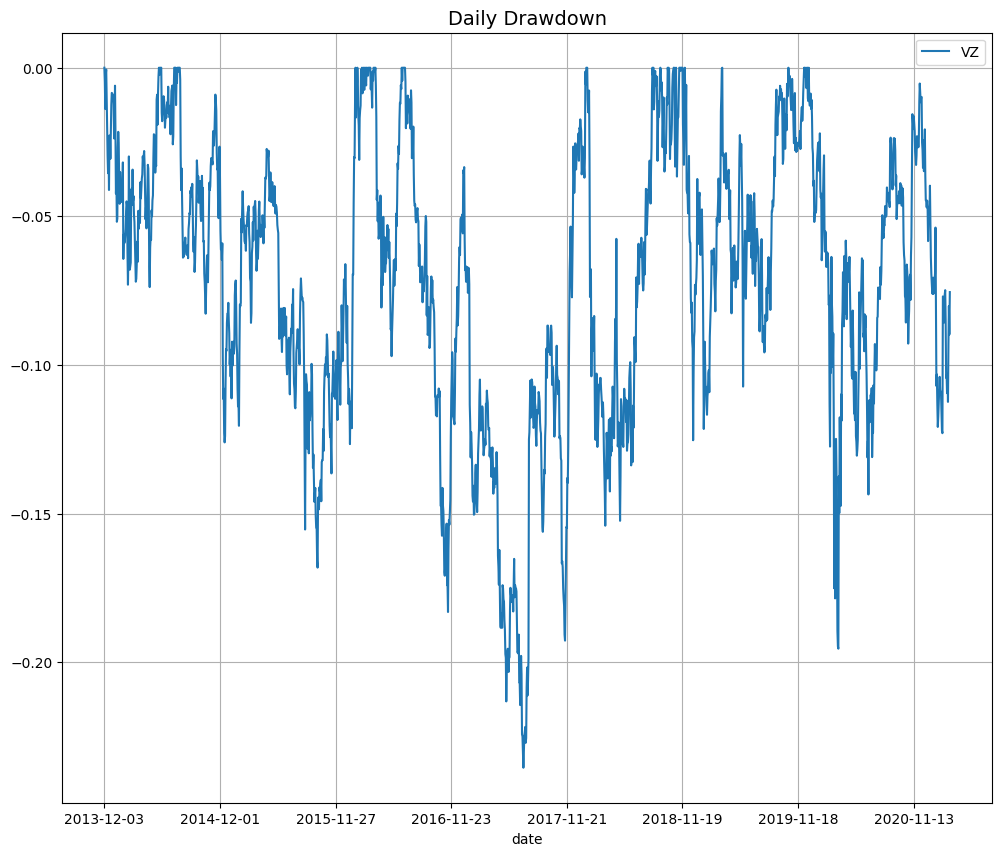

In [252]:
fig, ax = plt.subplots(figsize=(12,10))
daily_drawdown.plot(ax=ax);
ax.set_title("Daily Drawdown", fontsize=14)
plt.legend(loc="best");
plt.grid(True)
plt.show()

# fig.savefig('results/daily_drawdown.png');

In [253]:
# Using the average daily return to calculate portfolio return

returns = df.pct_change() # get the assets daily returns
mean_daily_returns = returns.mean().values


In [254]:
df

,JNJ,PG,KO,MCD,USB,JPM,GD,VZ,MMM,PEP,CL,LIN,DHR,HON,LMT,MDT,V,RTX,T,COST
date,,,,,,,,,,,,,,,,,,,,
2013-12-03,93.970001,83.830002,40.349998,96.379997,38.520000,56.860001,90.339996,49.599998,126.599998,83.800003,65.370003,124.239998,55.928734,83.009888,138.770004,57.639999,50.437500,69.030838,26.238670,123.820000
2013-12-04,93.629997,83.349998,40.369999,95.709999,39.000000,57.189999,89.480003,49.369999,126.459999,82.650002,65.040001,123.620003,55.845337,82.781075,136.229996,56.930000,50.685001,68.558846,26.132931,122.970001
2013-12-05,92.970001,82.690002,39.830002,95.430000,38.610001,55.820000,89.230003,48.910000,126.830002,81.900002,64.540001,122.489998,55.830173,82.809677,136.660004,56.910000,50.427502,68.628067,25.868580,120.949997
2013-12-06,94.440002,84.519997,40.459999,96.800003,39.660000,56.060001,90.790001,49.480000,128.610001,83.150002,65.660004,125.459999,56.952236,84.201599,138.190002,58.139999,50.467499,69.930771,26.080059,122.059998
2013-12-09,94.440002,84.779999,40.400002,95.720001,39.740002,56.509998,90.529999,49.570000,128.570007,82.690002,65.690002,125.410004,57.149357,83.772583,138.929993,57.869999,50.397499,69.968536,26.200907,121.660004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-04,153.070007,122.150002,49.939999,204.839996,51.020000,150.559998,165.770004,54.799999,177.630005,128.830002,74.440002,245.419998,214.410004,202.940002,338.250000,115.269997,211.500000,74.419998,21.842899,319.040009
2021-03-05,156.100006,125.980003,50.790001,207.369995,52.470001,150.910004,170.520004,56.000000,180.800003,133.029999,76.059998,247.639999,218.350006,206.580002,340.429993,118.260002,215.410004,75.180000,22.371601,317.320007
2021-03-08,157.399994,127.309998,51.639999,209.110001,54.049999,152.910004,172.690002,56.790001,183.770004,132.130005,76.449997,253.679993,212.380005,207.699997,341.450012,116.669998,220.270004,75.610001,22.651056,311.420013


In [255]:
#Annualized Return, Variance and Standard Deviation

def get_annualized_return(prices, weigths):
    months = (pd.to_datetime(df.index)[-1] - pd.to_datetime(df.index)[0]) / np.timedelta64(1, 'M')
    months = np.floor(months)
    total_return = (prices.iloc[-1].dot(weigths) - prices.iloc[0].dot(weigths)) / prices.iloc[0].dot(weigths)
    annualized_return = ((1 + total_return) ** (12 / months)) - 1
    return annualized_return

def get_portfolio_variance(returns, weigths):
    covariance_returns = returns.cov() * 250
    return np.dot(weigths.T, np.dot(covariance_returns, weigths))


In [256]:
# Sharpe ratio
rfr = 0.04 #Risk free rate

In [257]:
import matplotlib
matplotlib.use('Agg')

In [258]:
import env_portfolio
from env_portfolio import StockPortfolioEnv

import models
from models import DRLAgent

In [259]:

from backtest import BackTestStats, BaselineStats, BackTestPlot, backtest_strat, baseline_strat
from backtest import backtest_strat, baseline_strat

In [260]:
stock_dimension = len(train_df.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 20, State Space: 20


In [261]:
weights_initial = [1/stock_dimension]*stock_dimension

In [262]:
train_df.head()

,date,Open,High,Low,Close,Volume,tic,cov_list,f01,f02,f03,f04
0,2013-12-03,65.010002,65.430000,64.879997,65.370003,2183700,CL,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,123.720001,123.970001,122.970001,123.820000,1767900,COST,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,56.315392,56.444275,55.754360,55.928734,3117061,DHR,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,91.089996,91.360001,90.019997,90.339996,1198600,GD,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,83.848846,83.848846,82.638069,83.009888,2430852,HON,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116


In [263]:
train_df.shape

(36560, 12)

In [264]:
train_df = train_df.rename(columns={'Close': 'close'})
train_df = train_df.rename(columns={'Open': 'open'})
train_df = train_df.rename(columns={'High': 'high'})
train_df = train_df.rename(columns={'Low': 'low'})
train_df = train_df.rename(columns={'Volume': 'volume'})

In [265]:
train_df.head()

,date,open,high,low,close,volume,tic,cov_list,f01,f02,f03,f04
0,2013-12-03,65.010002,65.430000,64.879997,65.370003,2183700,CL,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,123.720001,123.970001,122.970001,123.820000,1767900,COST,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,56.315392,56.444275,55.754360,55.928734,3117061,DHR,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,91.089996,91.360001,90.019997,90.339996,1198600,GD,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116
0,2013-12-03,83.848846,83.848846,82.638069,83.009888,2430852,HON,"[[9.88188682115059e-05, 4.637338976698862e-05,...",0.968878,1.040823,1.991801,1.938116


In [126]:
tech_indicator_list = ['f01','f02','f03','f04']

In [127]:
env_kwargs = {
    "hmax": 500, 
    "initial_amount": 1000000, 
    "transaction_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": tech_indicator_list, 
    "action_space": stock_dimension, 
    "reward_scaling": 0,
    'initial_weights': [1/stock_dimension]*stock_dimension
}

In [128]:
e_train_gym = StockPortfolioEnv(df = train_df, **env_kwargs)

In [129]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


C:\Users\SANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [130]:
# initialize
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [131]:
trained_a2c = agent.train_model(model=model_a2c, 
                                tb_log_name='a2c',
                                total_timesteps=50000)

Logging to tensorboard_log/a2c\a2c_16
-------------------------------------
| time/                 |           |
|    fps                | 137       |
|    iterations         | 100       |
|    time_elapsed       | 3         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -28.3     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updates          | 99        |
|    policy_loss        | 9.25e+07  |
|    std                | 0.997     |
|    value_loss         | 1.48e+13  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 138       |
|    iterations         | 200       |
|    time_elapsed       | 7         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -28.3     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updat

begin_total_asset:1000000
end_total_asset:2087013.646114219
Sharpe:  0.7219374524359692
------------------------------------
| time/                 |          |
|    fps                | 129      |
|    iterations         | 1500     |
|    time_elapsed       | 58       |
|    total_timesteps    | 7500     |
| train/                |          |
|    entropy_loss       | -28.3    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 1499     |
|    policy_loss        | 9.26e+07 |
|    std                | 0.994    |
|    value_loss         | 1.27e+13 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 129      |
|    iterations         | 1600     |
|    time_elapsed       | 61       |
|    total_timesteps    | 8000     |
| train/                |          |
|    entropy_loss       | -28.2    |
|    explained_variance | 0        |
|    learning_rate      

-------------------------------------
| time/                 |           |
|    fps                | 135       |
|    iterations         | 2900      |
|    time_elapsed       | 106       |
|    total_timesteps    | 14500     |
| train/                |           |
|    entropy_loss       | -28.1     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updates          | 2899      |
|    policy_loss        | 1.52e+08  |
|    std                | 0.988     |
|    value_loss         | 4.09e+13  |
-------------------------------------
begin_total_asset:1000000
end_total_asset:2016732.5216725233
Sharpe:  0.684157900601023
------------------------------------
| time/                 |          |
|    fps                | 135      |
|    iterations         | 3000     |
|    time_elapsed       | 110      |
|    total_timesteps    | 15000    |
| train/                |          |
|    entropy_loss       | -28.1    |
|    explained_variance | 0        |
|    lear

------------------------------------
| time/                 |          |
|    fps                | 137      |
|    iterations         | 4300     |
|    time_elapsed       | 156      |
|    total_timesteps    | 21500    |
| train/                |          |
|    entropy_loss       | -28      |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 4299     |
|    policy_loss        | 1.46e+08 |
|    std                | 0.982    |
|    value_loss         | 2.99e+13 |
------------------------------------
begin_total_asset:1000000
end_total_asset:1903085.3348566769
Sharpe:  0.6386540207762275
------------------------------------
| time/                 |          |
|    fps                | 137      |
|    iterations         | 4400     |
|    time_elapsed       | 160      |
|    total_timesteps    | 22000    |
| train/                |          |
|    entropy_loss       | -28      |
|    explained_variance | 1.19e-07 |
|    learning_rate     

------------------------------------
| time/                 |          |
|    fps                | 139      |
|    iterations         | 5700     |
|    time_elapsed       | 204      |
|    total_timesteps    | 28500    |
| train/                |          |
|    entropy_loss       | -27.9    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 5699     |
|    policy_loss        | 1.34e+08 |
|    std                | 0.975    |
|    value_loss         | 2.79e+13 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 139      |
|    iterations         | 5800     |
|    time_elapsed       | 208      |
|    total_timesteps    | 29000    |
| train/                |          |
|    entropy_loss       | -27.8    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 5799     |
|    policy_loss        | 1.39e+08 |
|

-------------------------------------
| time/                 |           |
|    fps                | 138       |
|    iterations         | 7100      |
|    time_elapsed       | 255       |
|    total_timesteps    | 35500     |
| train/                |           |
|    entropy_loss       | -27.8     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updates          | 7099      |
|    policy_loss        | 1.12e+08  |
|    std                | 0.969     |
|    value_loss         | 1.88e+13  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 138      |
|    iterations         | 7200     |
|    time_elapsed       | 259      |
|    total_timesteps    | 36000    |
| train/                |          |
|    entropy_loss       | -27.7    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 7199     |
|    policy_loss       

begin_total_asset:1000000
end_total_asset:1822706.4922882218
Sharpe:  0.5941134427098488
-------------------------------------
| time/                 |           |
|    fps                | 138       |
|    iterations         | 8500      |
|    time_elapsed       | 306       |
|    total_timesteps    | 42500     |
| train/                |           |
|    entropy_loss       | -27.7     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0002    |
|    n_updates          | 8499      |
|    policy_loss        | 1.01e+08  |
|    std                | 0.967     |
|    value_loss         | 1.35e+13  |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 138      |
|    iterations         | 8600     |
|    time_elapsed       | 310      |
|    total_timesteps    | 43000    |
| train/                |          |
|    entropy_loss       | -27.7    |
|    explained_variance | 5.96e-08 |
|    lea

begin_total_asset:1000000
end_total_asset:1983053.8257903492
Sharpe:  0.670230733571736
------------------------------------
| time/                 |          |
|    fps                | 137      |
|    iterations         | 9900     |
|    time_elapsed       | 358      |
|    total_timesteps    | 49500    |
| train/                |          |
|    entropy_loss       | -27.6    |
|    explained_variance | 0        |
|    learning_rate      | 0.0002   |
|    n_updates          | 9899     |
|    policy_loss        | 8.63e+07 |
|    std                | 0.96     |
|    value_loss         | 1.18e+13 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 137       |
|    iterations         | 10000     |
|    time_elapsed       | 362       |
|    total_timesteps    | 50000     |
| train/                |           |
|    entropy_loss       | -27.5     |
|    explained_variance | -1.19e-07 |
|    learning_r

# ppo

In [132]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device


In [133]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=50000)

Logging to tensorboard_log/ppo\ppo_5
begin_total_asset:1000000
end_total_asset:2002461.616346536
Sharpe:  0.6826500134897019
-----------------------------
| time/              |      |
|    fps             | 198  |
|    iterations      | 1    |
|    time_elapsed    | 10   |
|    total_timesteps | 2048 |
-----------------------------
begin_total_asset:1000000
end_total_asset:2079165.8552976106
Sharpe:  0.7099290200577231
---------------------------------------
| time/                   |           |
|    fps                  | 179       |
|    iterations           | 2         |
|    time_elapsed         | 22        |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -28.4     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 2.83e+14  |
|    n_updates  

begin_total_asset:1000000
end_total_asset:2133542.7377938824
Sharpe:  0.7360283737987693
---------------------------------------
| time/                   |           |
|    fps                  | 155       |
|    iterations           | 11        |
|    time_elapsed         | 145       |
|    total_timesteps      | 22528     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -28.4     |
|    explained_variance   | 1.19e-07  |
|    learning_rate        | 0.0001    |
|    loss                 | 2.5e+14   |
|    n_updates            | 100       |
|    policy_gradient_loss | -2.23e-07 |
|    std                  | 1         |
|    value_loss           | 5.31e+14  |
---------------------------------------
begin_total_asset:1000000
end_total_asset:1961360.180365343
Sharpe:  0.6603012010642338
---------------------------------------
| time/                

begin_total_asset:1000000
end_total_asset:2001139.8565936838
Sharpe:  0.6760907538629156
---------------------------------------
| time/                   |           |
|    fps                  | 151       |
|    iterations           | 20        |
|    time_elapsed         | 270       |
|    total_timesteps      | 40960     |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -28.4     |
|    explained_variance   | 0         |
|    learning_rate        | 0.0001    |
|    loss                 | 2.78e+14  |
|    n_updates            | 190       |
|    policy_gradient_loss | -5.76e-07 |
|    std                  | 1         |
|    value_loss           | 5.39e+14  |
---------------------------------------
begin_total_asset:1000000
end_total_asset:1942866.2872435208
Sharpe:  0.6522602390856083
---------------------------------------
| time/               

# ddpg

In [134]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}


model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device


In [135]:
trained_ddpg = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=50000)

Logging to tensorboard_log/ddpg\ddpg_6
begin_total_asset:1000000
end_total_asset:2020994.168595884
Sharpe:  0.6886100512656552
begin_total_asset:1000000
end_total_asset:2045614.1071479346
Sharpe:  0.6902808409370745
begin_total_asset:1000000
end_total_asset:2045614.1071479346
Sharpe:  0.6902808409370745
begin_total_asset:1000000
end_total_asset:2045614.1071479346
Sharpe:  0.6902808409370745
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 21        |
|    time_elapsed    | 343       |
|    total_timesteps | 7312      |
| train/             |           |
|    actor_loss      | -3.15e+07 |
|    critic_loss     | 1.44e+12  |
|    learning_rate   | 0.001     |
|    n_updates       | 5484      |
----------------------------------
begin_total_asset:1000000
end_total_asset:2045614.1071479346
Sharpe:  0.6902808409370745
begin_total_asset:1000000
end_total_asset:2045614.1071479346
Sharpe:  0.6902808409370745
begin_to

KeyboardInterrupt: 

# dqn 

In [136]:
from collections import deque
import numpy as np
import random
import tensorflow as tf


class Model():
    '''
    Deep Q-learning model (DQN) that uses a neural network to approximate the Q-function.
    This is the same as the single_feature_model.py, but this model takes in multiple features.
    The number of features is defined by the num_features parameter.
    '''
    def __init__(self, state_size, num_features, action_space=3, model_name="model"):
        self.num_features = num_features
        self.state_size = state_size
        self.action_space = action_space # Action space of 3 - Buy, Sell and Hold
        self.model_name = model_name
        self.model = None

        # Replay memory is a queue of the last 2000 transactions
        # This is used to train the model
        self.memory = deque(maxlen=2000) 
        self.inventory = []

        self.gamma = 0.95 # Maximize reward over long-term
        self.epsilon = 1.0 # 1.0 means model will explore the environment randomly during training
        self.epsilon_final = 0.01 # Decrease epsilon over time to take less random actions
        self.epsilon_decay = 0.995 # Decay rate of epsilon

    def model_builder(self):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(units=64, activation="relu", input_shape=(None, self.state_size, self.num_features)))
        model.add(tf.keras.layers.Dense(units=128, activation="relu"))
        model.add(tf.keras.layers.Dense(units=256, activation="relu"))
        model.add(tf.keras.layers.Dense(self.action_space, activation="linear")) # We use linear activation cuz it's a regression task w/ no set range
        model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5))
        self.model = model
        return model
    
    def trade(self, state, is_eval=False):
        '''
        The model generates a random floating point number between 0 and 1. 
        If the number is less than epsilon, the model will explore the environment randomly.
        If the number is greater than epsilon, the model will exploit the environment by choosing the best action.
        '''
        if random.random() <= self.epsilon and not is_eval:
            return random.randrange(self.action_space)
        state = state.reshape(-1, 1, self.state_size, self.num_features) # Reshape the state to have shape (batch_size, state_size, num_features)
        # state = np.expand_dims(state, axis=0) # Add a dimension to the state to have shape (batch_size, 1, state_size, num_features)
        actions = self.model.predict(state, verbose=0)
        return np.argmax(actions, axis=-1)[0][0][0] # For some reason, the model outputs a 3D array, so we need to squeeze it to get the action
    
    def batch_train(self, batch_size):
        batch = random.sample(self.memory, batch_size) # (state, action, reward, next_state, done)
        states = np.array([transition[0] for transition in batch])
        actions = np.array([transition[1] for transition in batch])
        rewards = np.array([transition[2] for transition in batch])
        next_states = np.array([transition[3] for transition in batch])
        dones = np.array([transition[4] for transition in batch])

        targets = self.model.predict(states, verbose=0)
        targets_next = self.model.predict(next_states, verbose=0)

        # print(states.shape, actions.shape, rewards.shape, next_states.shape, dones.shape, targets.shape, targets_next.shape)
        # (32, 1, 10, 6) (32,) (32,) (32, 1, 10, 6) (32,) (32, 1, 10, 3) (32, 1, 10, 3) -> Shapes of the arrays for multi_feature model
        # (32, 1, 10)    (32,) (32,) (32, 1, 10)    (32,) (32, 3)        (32, 1, 3) -> Shapes of the arrays for single_feature model

        for i in range(batch_size):
            if dones[i]:
                # Add reward to the last dimension
                targets[i, :, :, actions[i]] = rewards[i]
            else:
                targets[i, :, :, actions[i]] = rewards[i] + self.gamma * np.amax(targets_next[i], axis=-1)
        
        self.model.fit(states, targets, epochs=1, verbose=0)

        if self.epsilon > self.epsilon_final:
            self.epsilon *= self.epsilon_decay

In [274]:
!pip install data-extractor


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [281]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
from datetime import *
from scipy.special import expit
from tqdm import tqdm
from data_extractor import label_buy_sell_hold
from multi_feature_model import Model
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


def format_price(n):
    '''
    Formats a number into a string with 2 decimal places.
    '''
    # Convert n from numpy array to float
    n = float(n)
    
    if n < 0:
        return "-${0:2f}".format(abs(n))
    else:
        return "${0:2f}".format(abs(n))


def state_creator(data, timestep, window_size):
    '''
    Changes input data to be differences in stock prices,
    which represent price changes over time. 
    This will allow model to predict buy/sell/hold rather than the price itself.
    '''
    starting_id = timestep - window_size + 1
    if starting_id >= 0:
        windowed_data = data[starting_id:timestep + 1]
    else:
        windowed_data = -starting_id * [data[0]] + list(data[0: timestep + 1])
    
    state = []
    for i in range(window_size - 1):
        # expit is logistic sigmoid function, and avoids overflow errors associated w/ large diffs in stock price
        # https://i.stack.imgur.com/WY61Z.png
        state.append(expit(windowed_data[i + 1] - windowed_data[i]))
    return np.array([state])


def train_model(data, model, window_size, episodes, batch_size=32, name="model_multifeature"):
    for episode in range(1, episodes + 1): # For printing purposes
        print("Episode: {}/{}".format(episode, episodes))
        state = state_creator(data, 0, window_size + 1)
        total_profit = 0
        model.inventory = []

        for t in tqdm(range(len(data))):
            # print("Timestep: {}/{}".format(t, len(data)))
            action = model.trade(state)
            
            # If action is not a scalar, then take the element within all the embedded arrays
            # I don't know why it does this, someone feel free to fix it
            if not np.isscalar(action):
                print(action)
                # action = action[0][0][0]

            if t == len(data) - 1:
                # When the episode is done, we don't have a next state, so we set it to the last state
                next_state = state
            else:            
                next_state = state_creator(data, t + 1, window_size + 1)
            reward = 0

            # Buy stock
            if action == 1:
                model.inventory.append(data[t][0]) # Append the closing price
                # print("Buy: {}".format(format_price(data[t][0])))

            # Sell stock
            elif action == 2 and len(model.inventory) > 0:
                bought_price = model.inventory.pop(0) # This will be a scalar
                reward = max(data[t][0] - bought_price, 0)
                total_profit += data[t][0] - bought_price
                # print("Sell: {} | Profit: {}".format(format_price(data[t][0]), format_price(data[t][0] - bought_price)))

            # Hold stock
            elif action == 0:
                # print("Hold: {}".format(format_price(data[t][0])))
                pass
            
            # If the episode is done, we fit the model to the target
            done = True if t == len(data) - 1 else False    
            model.memory.append((state, action, reward, next_state, done))
            state = next_state

            if done:
                print("--------------------------------")
                print("Total Profit: {}".format(format_price(total_profit)))
                print("--------------------------------")
            
            if len(model.memory) > batch_size:
                model.batch_train(batch_size)
        
        print("Total Profit: {}".format(format_price(total_profit)))
        print("Saving model...")
        model.model.save(f"models/{name}.h5")


def train_multistock(stocks, start_date, end_date, window_size, episodes, batch_size=32, name="model_multifeature"):
    '''
    Given a list of stocks, fit the model to all the stocks.  
    '''
    trader = None
    for stock in stocks:
        print(f"Loading data for {stock}...")
        data = dataloader(stock, 'data/', start_date, end_date)

        # Get closing price, MACD, RSI, CCI, ADX
        data = data[["close", "f01", "f02", "f03", "f04"]].values
        # data = data[["Close"]].values

        # Generate and append the buy/sell/hold signal to the data
        labels = np.array(label_buy_sell_hold(data))

        # Convert labels to 2D array of size (len(labels), 1)
        labels = labels.reshape(len(labels), 1)
        data = np.append(data, labels, axis=1)

        # Get the epsCurrentYear, epsForward, forwardPE, fiftyDayAverage, marketCap
        # df = web.get_quote_yahoo(stock)
        # df = df[["epsCurrentYear", "epsForward", "forwardPE", "fiftyDayAverage", "marketCap"]]

        # Extend df to match the length of data
        # df = pd.concat([df] * len(data), ignore_index=True)
        
        # Append the epsCurrentYear, epsForward, forwardPE, fiftyDayAverage, marketCap to data
        # data = np.append(data, df, axis=1)

        # Create the model only once during the first iteration of the loop
        if not trader:
            print("Model created.")
            trader = Model(window_size, num_features=data.shape[1])
            trader.model = trader.model_builder()
            # trader.model.summary()
        
        print(f"Training model for {stock}...")
        train_model(data, trader, window_size, episodes, batch_size, name)


def test_model(data, model, window_size, stock, start_date, end_date):
    '''
    Test the trained model by having it trade for a set test period.    
    For this, we don't use the memory, and we don't need the reward.
    '''
    state = state_creator(data, 0, window_size + 1)
    total_profit = 0
    model.inventory = []
    profits = []

    for t in range(len(data)):
        print("Timestep: {}/{}".format(t, len(data)))
        action = model.trade(state, is_eval=True)
        print("Action: {}".format(action))
        if t == len(data) - 1:
            # When the episode is done, we don't have a next state, so we set it to the last state
            next_state = state
        else:            
            next_state = state_creator(data, t + 1, window_size + 1)

        # Buy stock
        if action == 1:
            model.inventory.append(data[t])
            print("Buy: {}".format(format_price(data[t])))

        # Sell stock
        elif action == 2 and len(model.inventory) > 0:
            bought_price = model.inventory.pop(0) 
            total_profit += data[t] - bought_price
            print("Sell: {} | Profit: {}".format(format_price(data[t]), format_price(data[t] - bought_price)))

        # Hold stock
        elif action == 0:
            print("Hold: {}".format(format_price(data[t])))
            pass
        state = next_state

        # Save the profit for each timestep
        profits.append(total_profit)
    print(profits)
    print("Overall Profit Over Testing Period: {}".format(format_price(total_profit)))

    # Use matplotlib to plot the profit over time
    plt.plot(profits)
    plt.xlabel('Time (Days)')
    plt.ylabel('Profit (USD)')
    plt.title(f'Profit Over Time for {stock} From {start_date} to {end_date}')
    plt.legend([f'{stock}'])
    if not os.path.exists('plots'):
        os.makedirs('plots')
    plt.savefig(f'plots/{stock.lower()}.png')
    plt.show()


if __name__ == "__main__":
    # Hyperparameters  
    window_size = 10
    episodes = 2
    batch_size = 32
    stock = 'V'
    stocks = [selected_stocks]
    start_date = '2022-01-01'
    end_date = '2023-01-01'
    name = "S&P500"
    
    train_multistock(stocks, start_date, end_date, window_size, episodes, batch_size, name)

    ### Testing the model ###
    test_start = '2023-01-02'
    test_end = '2023-03-02'

    # Get the stock closing price and technical indicators for the past week
    test_data = prices_full_test_df
    test_data = test_data[["close", "f01", "f02", "f03", "f04"]].values
    # test_data = test_data[["Close"]].values
    
    # test_df = web.get_quote_yahoo(stock)
    # test_df = test_df[["epsCurrentYear", "epsForward", "forwardPE", "fiftyDayAverage", "marketCap"]]
    # test_df = pd.concat([test_df] * len(test_data), ignore_index=True)
    # test_data = np.append(test_data, test_df, axis=1)

    # This is a placeholder signal, it will be replaced by the output of the sentiment analysis model
    signal = "buy" # Change this to get output from sentiment analysis model
    if signal == "buy":
        # Create an array of 1s the same length as test_data
        signal = np.ones((len(test_data), 1))
    elif signal == "sell":
        # Create an array of 2s the same length as test_data
        signal = 2 * np.ones((len(test_data), 1))
    elif signal == "hold":
        # Create an array of 0s the same length as test_data
        signal = np.zeros((len(test_data), 1))
    test_data = np.append(test_data, signal, axis=1)

    # Load the model
    trader = Model(window_size, num_features=test_data.shape[1])
    trader.model = trader.model_builder()
    trader.model.load_weights(f"models/{name}.h5")

    # Test the model
    test_model(test_data, trader, window_size, stock, test_start, test_end)
    quit()

    # Use the model to predict the stock price for tomorrow
    state = state_creator(test_data, 0, window_size + 1)
    action = trader.trade(state)

    actions = {
        0: "Hold",
        1: "Buy",
        2: "Sell"
    }
    print("Action for {} on {}: {}".format(stock, today, actions[action]))

ImportError: cannot import name 'label_buy_sell_hold' from 'data_extractor' (C:\Users\SANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\data_extractor\__init__.py)

In [ ]:
# A2C Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_train_daily_return, a2c_train_weights = DRLAgent.DRL_prediction(model=trained_a2c,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

In [ ]:
# PPO Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_train_daily_return, ppo_train_weights = DRLAgent.DRL_prediction(model=trained_ppo,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

In [ ]:
# DDPG Train Model
e_trade_gym = StockPortfolioEnv(df = train_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_train_daily_return, ddpg_train_weights = DRLAgent.DRL_prediction(model=trained_ddpg,
                        test_data = train_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

In [ ]:
# Store the Training Models
%store a2c_train_daily_return
%store ppo_train_daily_return
%store ddpg_train_daily_return

In [85]:
test_df.head(3)

,date,Open,High,Low,Close,Volume,tic,cov_list,f01,f02,f03,f04
0,2021-03-11,260.00000,268.109985,260.000000,266.369995,2972000,ACN,"[[0.0006146582747316243, 0.0005151199896327714...",2.709271,0.510346,4.35304,1.816536
0,2021-03-11,732.47998,733.690002,719.330017,722.119995,751600,BLK,"[[0.0006146582747316243, 0.0005151199896327714...",2.709271,0.510346,4.35304,1.816536
0,2021-03-11,75.57000,75.860001,75.110001,75.269997,4842600,CL,"[[0.0006146582747316243, 0.0005151199896327714...",2.709271,0.510346,4.35304,1.816536


In [87]:
test_df = test_df.rename(columns={'Close': 'close'})
test_df = test_df.rename(columns={'Open': 'open'})
test_df = test_df.rename(columns={'High': 'high'})
tes_df = test_df.rename(columns={'Low': 'low'})
test_df = test_df.rename(columns={'Volume': 'volume'})

In [88]:
# A2C Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

a2c_test_daily_return, a2c_test_weights = DRLAgent.DRL_prediction(model=trained_a2c,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

C:\Users\SANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1105387.3921986395
Sharpe:  0.4421526974013133


In [89]:
a2c_test_daily_return.head()

,date,daily_return
0,2021-03-11,0.000000
1,2021-03-12,0.005388
2,2021-03-15,0.008031
3,2021-03-16,-0.000479
4,2021-03-17,0.002721


In [90]:
# PPO Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ppo_test_daily_return, ppo_test_weights = DRLAgent.DRL_prediction(model=trained_ppo,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

C:\Users\SANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1105429.375909273
Sharpe:  0.4379122662760246


In [91]:
# DDPG Test Model
e_trade_gym = StockPortfolioEnv(df = test_df, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

ddpg_test_daily_return, ddpg_test_weights = DRLAgent.DRL_prediction(model=trained_ddpg,
                        test_data = test_df,
                        test_env = env_trade,
                        test_obs = obs_trade)

C:\Users\SANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


begin_total_asset:1000000
end_total_asset:1042931.4850153038
Sharpe:  0.22512915148709947


In [92]:
a2c_test_portfolio = a2c_test_daily_return.copy()
a2c_test_returns = a2c_test_daily_return.copy()

ppo_test_portfolio = ppo_test_daily_return.copy()
ppo_test_returns = ppo_test_daily_return.copy()

ddpg_test_portfolio = ddpg_test_daily_return.copy()
ddpg_test_returns = ddpg_test_daily_return.copy()

In [93]:
%store a2c_test_portfolio
%store a2c_test_returns 

%store ppo_test_portfolio
%store ppo_test_returns 

%store ddpg_test_portfolio
%store ddpg_test_returns 

Stored 'a2c_test_portfolio' (DataFrame)
Stored 'a2c_test_returns' (DataFrame)
Stored 'ppo_test_portfolio' (DataFrame)
Stored 'ppo_test_returns' (DataFrame)
Stored 'ddpg_test_portfolio' (DataFrame)
Stored 'ddpg_test_returns' (DataFrame)


In [94]:
%store -r max_sharpe_portfolio
%store -r uniform_weights_port

%store -r prices_train_df
%store -r prices_test_df


%store -r a2c_train_daily_return
%store -r ppo_train_daily_return
%store -r ddpg_train_daily_return

%store -r a2c_test_returns 
%store -r ppo_test_returns 
%store -r ddpg_test_returns 

no stored variable or alias max_sharpe_portfolio
no stored variable or alias uniform_weights_port
no stored variable or alias prices_train_df
no stored variable or alias prices_test_df


In [99]:
prices_full_test_df.head()

,PEP,JNJ,KO,HON,CL,LIN,MCD,VZ,BLK,MDLZ,PG,JPM,ACN,MMM,MDT,T,LMT,GD,COST,HD
date,,,,,,,,,,,,,,,,,,,,
2021-03-11,133.220001,159.139999,50.880001,212.500000,75.269997,267.369995,211.570007,55.509998,722.119995,56.270000,126.910004,154.320007,266.369995,184.570007,118.099998,22.311178,339.730011,172.669998,328.649994,268.850006
2021-03-12,133.039993,159.600006,50.360001,214.380005,75.510002,268.500000,212.339996,55.630001,716.190002,56.869999,128.139999,156.149994,264.950012,184.919998,118.809998,22.515106,340.190002,176.289993,331.140015,273.100006
2021-03-15,133.029999,160.419998,51.029999,216.199997,75.680000,269.000000,220.460007,55.639999,719.010010,57.230000,128.559998,155.369995,266.260010,189.479996,119.150002,22.605740,346.410004,176.710007,330.510010,278.540009
2021-03-16,134.009995,161.369995,51.220001,211.809998,75.860001,270.790009,219.860001,55.639999,723.070007,57.779999,128.940002,153.509995,263.519989,186.850006,118.940002,22.651056,347.130005,175.320007,327.250000,282.079987
2021-03-17,133.619995,160.770004,51.240002,213.029999,75.800003,269.549988,224.110001,55.750000,728.219971,57.919998,128.419998,155.089996,264.269989,188.300003,118.559998,22.771902,351.019989,177.520004,329.190002,280.029999


In [98]:
prices_full_test_df.set_index('date', inplace=True)

In [100]:
returns_train = df.pct_change() # get the assets daily returns
returns_test = prices_full_test_df.pct_change()

# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_returns = returns_train.dot(uw_weights)
uw_cum_returns = (1 + uw_returns).cumprod()
uw_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_returns = returns_train.dot(max_sharpe_weights)
max_sharpe_cum_returns = (1 + max_sharpe_returns).cumprod()
max_sharpe_cum_returns.name = "portfolio 2: max sharpe"

a2c_train_cum_returns = (1 + a2c_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
a2c_train_cum_returns = a2c_train_cum_returns['daily_return']
a2c_train_cum_returns.name = 'Portfolio 3: a2c Model'

ppo_train_cum_returns = (1 + ppo_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ppo_train_cum_returns = ppo_train_cum_returns['daily_return']
ppo_train_cum_returns.name = 'Portfolio 4: ppo Model'

ddpg_train_cum_returns = (1 + ddpg_train_daily_return.reset_index(drop=True).set_index(['date'])).cumprod()
ddpg_train_cum_returns = ddpg_train_cum_returns['daily_return']
ddpg_train_cum_returns.name = 'Portfolio 5: ddpg Model'

date_list = list(ddpg_train_cum_returns.index)

max_sharpe_cum_returns = max_sharpe_cum_returns[(max_sharpe_cum_returns.index).isin (date_list)]
uw_cum_returns = uw_cum_returns[(uw_cum_returns.index).isin (date_list)]

In [102]:
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_cum_returns.plot(ax=ax, color="black", alpha=0.4);
max_sharpe_cum_returns.plot(ax=ax, color="darkorange", alpha=0.4);

a2c_train_cum_returns.plot(ax=ax, color='blue', alpha=0.4)
ppo_train_cum_returns.plot(ax=ax, color='green', alpha=0.4)
ddpg_train_cum_returns.plot(ax=ax, color='purple', alpha=0.4)

plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("cummulative return");
ax.set_title("Backtest based on the train data", fontsize=14);
fig.savefig('results/back_test_on_train_data.png');

In [103]:
# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_test_returns = returns_test.dot(uw_weights)
uw_test_cum_returns = (1 + uw_test_returns).cumprod()
uw_test_cum_returns.name = "portfolio 1: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_test_returns = returns_test.dot(max_sharpe_weights)
max_sharpe_test_cum_returns = (1 + max_sharpe_test_returns).cumprod()
max_sharpe_test_cum_returns.name = "portfolio 2: max sharpe"

a2c_test_cum_returns = (1 + a2c_test_returns['daily_return']).cumprod()
a2c_test_cum_returns.name = 'Portfolio 3: a2c Model'

ppo_test_cum_returns = (1 + ppo_test_returns['daily_return']).cumprod()
ppo_test_cum_returns.name = 'Portfolio 4: ppo Model'

ddpg_test_cum_returns = (1 + ddpg_test_returns['daily_return']).cumprod()
ddpg_test_cum_returns.name = 'Portfolio 5: ddpg Model'

In [104]:
# Plot the culmulative returns of the portfolios
fig, ax = plt.subplots(figsize=(8,4))
uw_test_cum_returns.plot(ax=ax, color="black", alpha=.4);
max_sharpe_test_cum_returns.plot(ax=ax, color="darkorange");
a2c_test_cum_returns.plot(ax=ax, color='blue', alpha=.4)
ppo_test_cum_returns.plot(ax=ax, color='green', alpha=.4)
ddpg_test_cum_returns.plot(ax=ax, color='purple', alpha=.4)
plt.legend(loc="best");
plt.grid(True);
ax.set_ylabel("cummulative return");
ax.set_title("Backtest based on the test data", fontsize=14);
fig.savefig('results/back_test_on_test_data.png');

In [105]:
# Define a Function for Getting the Portfolio Statistics

def portfolio_stats(portfolio_returns):
    # Pass the returns into a dataframe
    port_rets_df = pd.DataFrame(portfolio_returns)
    port_rets_df = port_rets_df.reset_index()
    port_rets_df.columns = ['date','daily_return']
    
    #Use the FinRL Library to get the Portfolio Returns
    #This makes use of the Pyfolio Library
    
    DRL_strat = backtest_strat(port_rets_df)
    perf_func = timeseries.perf_stats 
    perf_stats_all = perf_func( returns=DRL_strat, 
                                  factor_returns=DRL_strat, 
                                    positions=None, transactions=None, turnover_denom="AGB")
    perf_stats_all = pd.DataFrame( perf_stats_all)
    perf_stats_all.columns = ['Statistic']
    return perf_stats_all

In [106]:
uw_test_returns.shape

(457,)

In [108]:
import pyfolio.timeseries as timeseries


In [109]:
# Get the Portfolio Statistics for all the portfolios
portfolios_returns_dict = {'uniform_weights':uw_test_returns, 'maximum_sharpe':max_sharpe_test_returns,
                          'a2c Model': a2c_test_returns['daily_return'],
                          'ppo Model': ppo_test_returns['daily_return'],
                          'ddpg Model': ddpg_test_returns['daily_return']}

portfolios_stats = pd.DataFrame()
for i,j in portfolios_returns_dict.items():
    port_stats = portfolio_stats(j)
    portfolios_stats[i] = port_stats['Statistic']

In [110]:
portfolios_stats

,uniform_weights,maximum_sharpe,a2c Model,ppo Model,ddpg Model
Annual return,0.045677,0.075400,0.056933,0.056955,0.023502
Cumulative returns,0.084370,0.140912,0.105387,0.105429,0.042931
Annual volatility,0.151151,0.174430,0.150980,0.153287,0.159810
Sharpe ratio,0.371629,0.504774,0.442153,0.437912,0.225129
Calmar ratio,0.227410,0.333959,0.298044,0.286929,0.104644
Stability,0.105855,0.011224,0.077677,0.072713,0.313110
Max drawdown,-0.200859,-0.225777,-0.191022,-0.198499,-0.224591
Omega ratio,1.065225,1.088724,1.077565,1.077621,1.039168
Sortino ratio,0.528910,0.727045,0.631005,0.626504,0.319246
Skew,NaN,NaN,-0.099735,-0.076031,-0.047889
